<a href="https://colab.research.google.com/github/tomraiz93/tam_project/blob/main/Emotion%2Cage%2Cgender%2Crace_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 kB 889.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 5.5 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116934 sha256=efc87381eea2ed7770f82667744b78e6133912f170b72da3fd74a2e6b189ae69
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire


In [3]:
pip install deepface opencv-python

In [2]:
from deepface import DeepFace

def detect(img):
  result = DeepFace.analyze(img, actions = ['age', 'gender', 'race', 'emotion'])
  return result

if __name__ == '__main__':
  img = 'aespa.jpg'
  result = detect(img)
  print(result)

24-01-11 17:53:19 - Directory /root/.deepface created
24-01-11 17:53:19 - Directory /root/.deepface/weights created
24-01-11 17:53:19 - facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 16.8MB/s]


24-01-11 17:53:22 - age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /root/.deepface/weights/age_model_weights.h5
100%|██████████| 539M/539M [00:03<00:00, 150MB/s]


24-01-11 17:53:29 - gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /root/.deepface/weights/gender_model_weights.h5
100%|██████████| 537M/537M [00:06<00:00, 88.2MB/s]


24-01-11 17:53:39 - race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: /root/.deepface/weights/race_model_single_batch.h5
100%|██████████| 537M/537M [00:05<00:00, 92.3MB/s]
Action: emotion: 100%|██████████| 4/4 [00:01<00:00,  2.20it/s]

[{'age': 25, 'region': {'x': 104, 'y': 172, 'w': 55, 'h': 55}, 'face_confidence': 9.249291098618414, 'gender': {'Woman': 99.57504272460938, 'Man': 0.42495676316320896}, 'dominant_gender': 'Woman', 'race': {'asian': 37.335047125816345, 'indian': 3.675292432308197, 'black': 1.7111247405409813, 'white': 31.39035999774933, 'middle eastern': 8.75517800450325, 'latino hispanic': 17.13300198316574}, 'dominant_race': 'asian', 'emotion': {'angry': 0.06293400656431913, 'disgust': 4.163068501039646e-08, 'fear': 0.2990670036524534, 'happy': 0.12547018704935908, 'sad': 1.5779206529259682, 'surprise': 0.015561669715680182, 'neutral': 97.9190468788147}, 'dominant_emotion': 'neutral'}, {'age': 22, 'region': {'x': 271, 'y': 162, 'w': 56, 'h': 56}, 'face_confidence': 7.876444123394322, 'gender': {'Woman': 72.80287146568298, 'Man': 27.197134494781494}, 'dominant_gender': 'Woman', 'race': {'asian': 99.36118721961975, 'indian': 0.03210160066373646, 'black': 0.0012179879377072211, 'white': 0.223378953523933

Action: emotion: 100%|██████████| 4/4 [00:02<00:00,  1.57it/s]


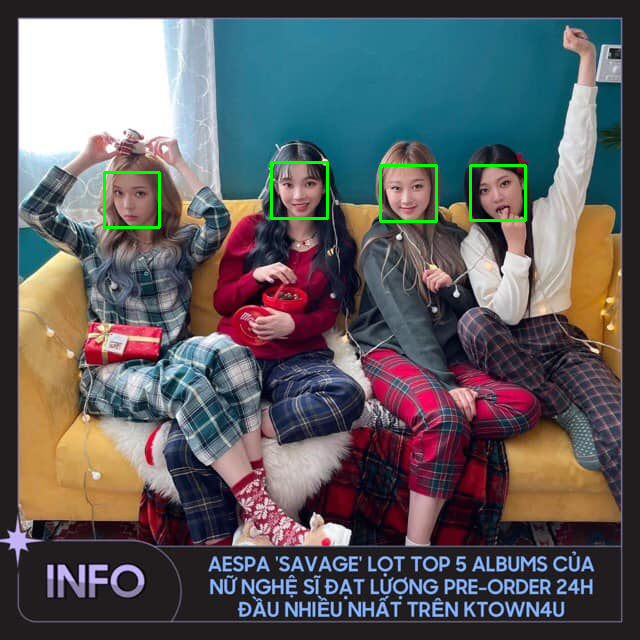

In [7]:
from deepface import DeepFace
from google.colab.patches import cv2_imshow
import cv2

def detect_and_draw(img_path):
    # Detect face attributes using DeepFace
    result = DeepFace.analyze(img_path, actions=['age', 'gender', 'race', 'emotion'])

    # Load the image using OpenCV
    img = cv2.imread(img_path)

    # Draw a rectangle around the detected face
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(img, scaleFactor=1.1, minNeighbors=5)

    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Display the image with the rectangle
    cv2_imshow(img)

if __name__ == '__main__':
    img_path = 'aespa.jpg'
    detect_and_draw(img_path)


Action: emotion: 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]


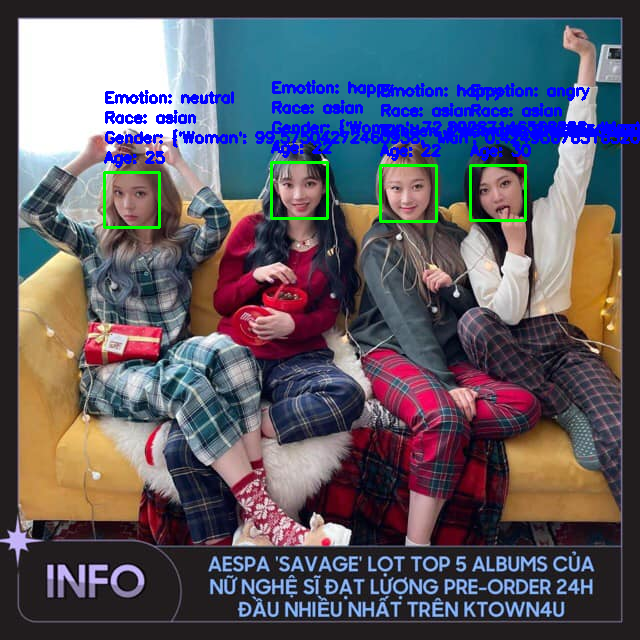

In [13]:
from deepface import DeepFace
from google.colab.patches import cv2_imshow
import cv2

def detect_and_draw(img_path):
    # Detect face attributes using DeepFace
    result = DeepFace.analyze(img_path, actions=['age', 'gender', 'race', 'emotion'])

    # Load the image using OpenCV
    img = cv2.imread(img_path)

    # Draw a rectangle around each detected face and display the detection result
    for face_info in result:
        x, y, w, h = face_info['region']['x'], face_info['region']['y'], face_info['region']['w'], face_info['region']['h']
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Display detection result (age, gender, race, emotion) for each face
        cv2.putText(img, f"Age: {face_info['age']}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
        cv2.putText(img, f"Gender: {face_info['gender']}", (x, y - 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
        cv2.putText(img, f"Race: {face_info['dominant_race']}", (x, y - 50), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
        cv2.putText(img, f"Emotion: {face_info['dominant_emotion']}", (x, y - 70), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Display the image with rectangles and detection results
    cv2_imshow(img)

if __name__ == '__main__':
    img_path = 'aespa.jpg'
    detect_and_draw(img_path)


Action: emotion: 100%|██████████| 4/4 [00:01<00:00,  2.23it/s]


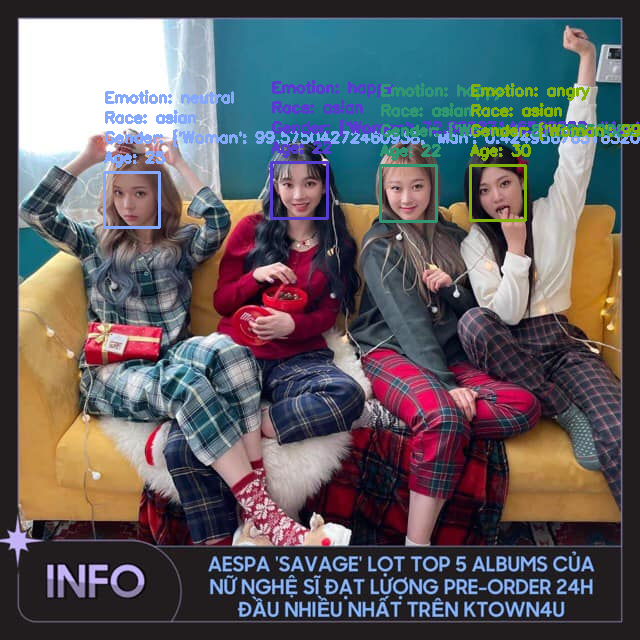

In [14]:
from deepface import DeepFace
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

def random_color():
    # Tạo một màu ngẫu nhiên
    return tuple(np.random.randint(0, 255, 3).tolist())

def detect_and_draw(img_path):
    # Detect face attributes using DeepFace
    result = DeepFace.analyze(img_path, actions=['age', 'gender', 'race', 'emotion'])

    # Load the image using OpenCV
    img = cv2.imread(img_path)

    # Draw a rectangle around each detected face and display the detection result
    for face_info in result:
        x, y, w, h = face_info['region']['x'], face_info['region']['y'], face_info['region']['w'], face_info['region']['h']

        # Tạo màu ngẫu nhiên
        color = random_color()

        # Vẽ hình chữ nhật với màu ngẫu nhiên
        cv2.rectangle(img, (x, y), (x+w, y+h), color, 2)

        # Hiển thị kết quả detection (tuổi, giới tính, chủng tộc, cảm xúc) cho mỗi khuôn mặt
        cv2.putText(img, f"Age: {face_info['age']}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
        cv2.putText(img, f"Gender: {face_info['gender']}", (x, y - 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
        cv2.putText(img, f"Race: {face_info['dominant_race']}", (x, y - 50), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
        cv2.putText(img, f"Emotion: {face_info['dominant_emotion']}", (x, y - 70), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Hiển thị ảnh với hình chữ nhật và kết quả detection
    cv2_imshow(img)

if __name__ == '__main__':
    img_path = 'aespa.jpg'
    detect_and_draw(img_path)


Action: emotion: 100%|██████████| 4/4 [00:02<00:00,  1.62it/s]


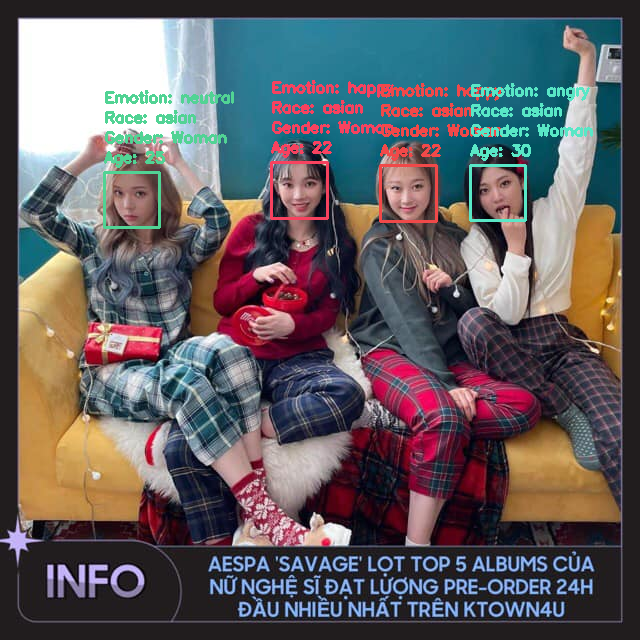

In [16]:
from deepface import DeepFace
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

def random_color():
    # Tạo một màu ngẫu nhiên
    return tuple(np.random.randint(0, 255, 3).tolist())

def detect_and_draw(img_path):
    # Detect face attributes using DeepFace
    result = DeepFace.analyze(img_path, actions=['age', 'gender', 'race', 'emotion'])

    # Load the image using OpenCV
    img = cv2.imread(img_path)

    # Draw a rectangle around each detected face and display the detection result
    for face_info in result:
        x, y, w, h = face_info['region']['x'], face_info['region']['y'], face_info['region']['w'], face_info['region']['h']

        # Tạo màu ngẫu nhiên
        color = random_color()

        # Vẽ hình chữ nhật với màu ngẫu nhiên
        cv2.rectangle(img, (x, y), (x+w, y+h), color, 2)

        # Lấy giới tính có xác suất cao hơn ngưỡng
        gender = 'Woman' if face_info['gender']['Woman'] > face_info['gender']['Man'] else 'Man'

        # Hiển thị kết quả detection (tuổi, giới tính, chủng tộc, cảm xúc) cho mỗi khuôn mặt
        cv2.putText(img, f"Age: {face_info['age']}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
        cv2.putText(img, f"Gender: {gender}", (x, y - 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
        cv2.putText(img, f"Race: {face_info['dominant_race']}", (x, y - 50), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
        cv2.putText(img, f"Emotion: {face_info['dominant_emotion']}", (x, y - 70), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Hiển thị ảnh với hình chữ nhật và kết quả detection
    cv2_imshow(img)

if __name__ == '__main__':
    img_path = 'aespa.jpg'
    detect_and_draw(img_path)


Action: emotion: 100%|██████████| 4/4 [00:02<00:00,  1.88it/s]


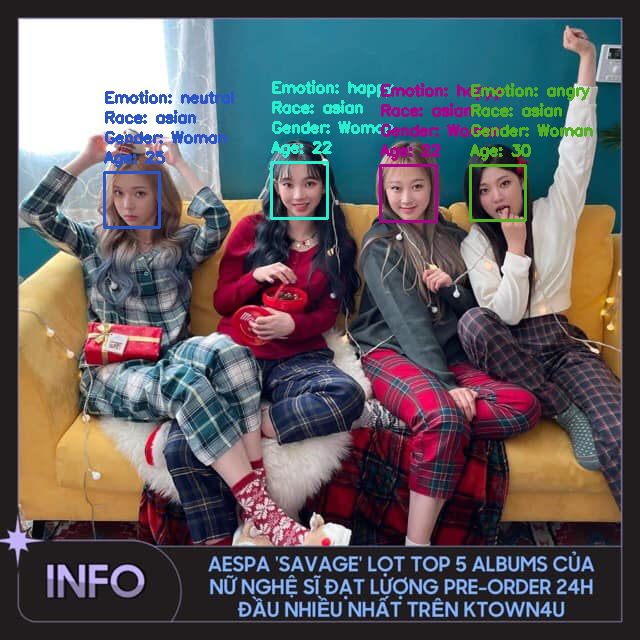

In [25]:
from deepface import DeepFace
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Danh sách chứa màu đã được sử dụng
used_colors = []

def random_color():
    global used_colors
    while True:
        # Tạo một màu ngẫu nhiên
        color = tuple(np.random.randint(0, 255, 3).tolist())

        # Kiểm tra xem màu đã được sử dụng chưa
        if color not in used_colors:
            used_colors.append(color)
            return color

def detect_and_draw(img_path):
    # Detect face attributes using DeepFace
    result = DeepFace.analyze(img_path, actions=['age', 'gender', 'race', 'emotion'])

    # Load the image using OpenCV
    img = cv2.imread(img_path)

    # Draw a rectangle around each detected face and display the detection result
    for face_info in result:
        x, y, w, h = face_info['region']['x'], face_info['region']['y'], face_info['region']['w'], face_info['region']['h']

        # Tạo màu ngẫu nhiên
        color = random_color()

        # Vẽ hình chữ nhật với màu ngẫu nhiên
        cv2.rectangle(img, (x, y), (x+w, y+h), color, 2)

        # Lấy giới tính có xác suất cao hơn ngưỡng
        gender = 'Woman' if face_info['gender']['Woman'] > face_info['gender']['Man'] else 'Man'

        # Hiển thị kết quả detection (tuổi, giới tính, chủng tộc, cảm xúc) cho mỗi khuôn mặt
        cv2.putText(img, f"Age: {face_info['age']}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
        cv2.putText(img, f"Gender: {gender}", (x, y - 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
        cv2.putText(img, f"Race: {face_info['dominant_race']}", (x, y - 50), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
        cv2.putText(img, f"Emotion: {face_info['dominant_emotion']}", (x, y - 70), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Hiển thị ảnh với hình chữ nhật và kết quả detection
    cv2_imshow(img)

if __name__ == '__main__':
    img_path = 'aespa.jpg'
    detect_and_draw(img_path)


Action: emotion: 100%|██████████| 4/4 [00:02<00:00,  1.41it/s]


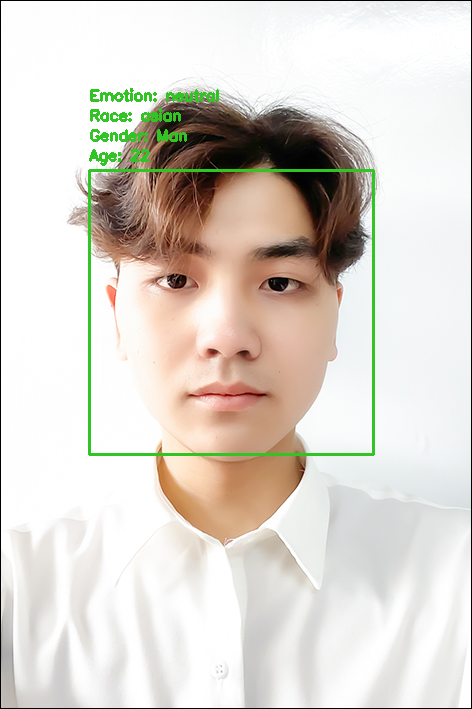

Action: emotion: 100%|██████████| 4/4 [00:02<00:00,  1.92it/s]


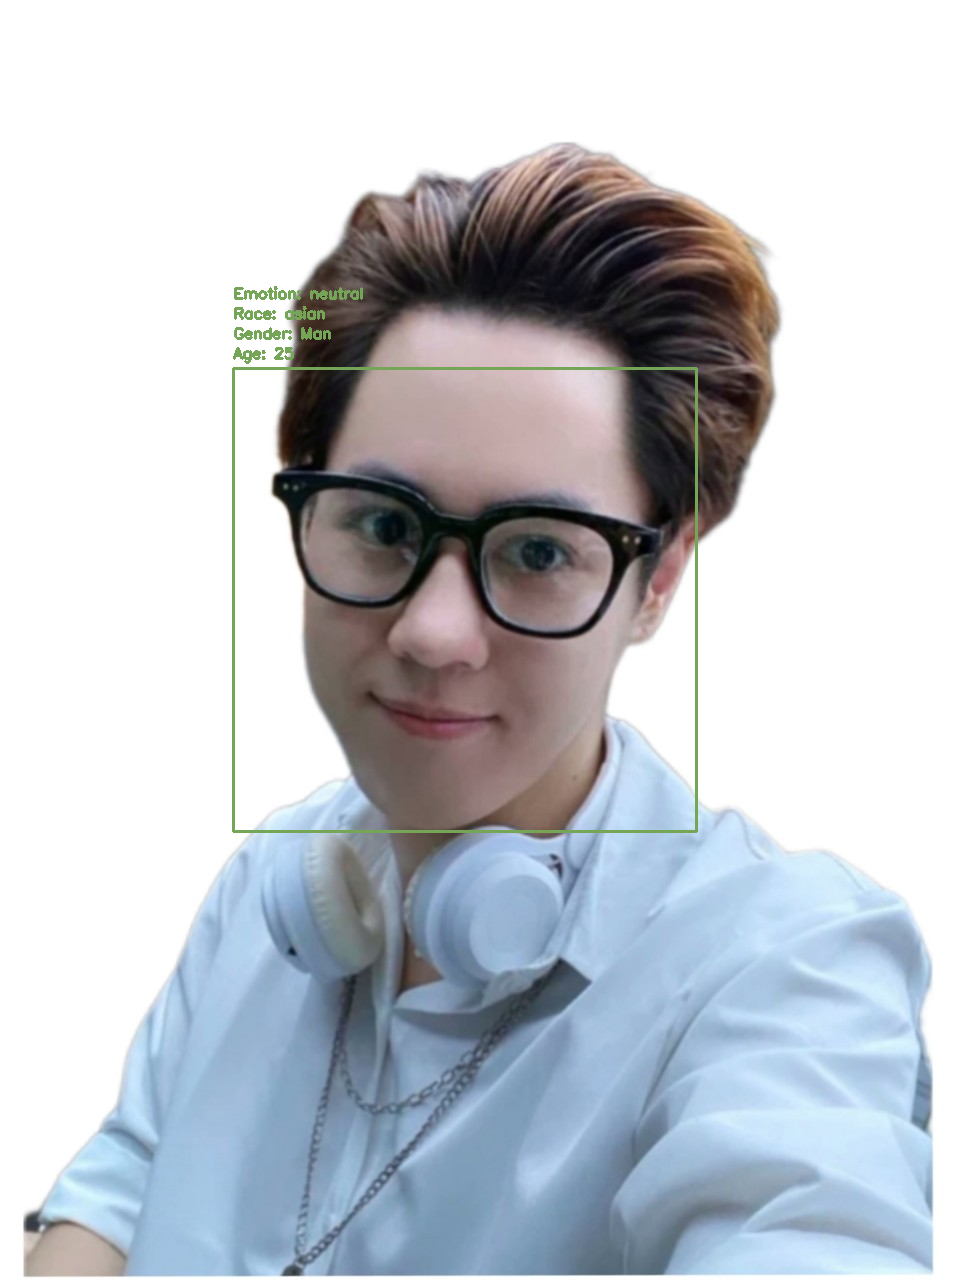

In [27]:
if __name__ == '__main__':
    img_path1 = 'phuong.jpg'  # Thay đổi tên ảnh và đường dẫn tương ứng
    img_path2 = 'tam.jpg'  # Thay đổi tên ảnh và đường dẫn tương ứng

    # Detect and draw for the first image
    detect_and_draw(img_path1)

    # Detect and draw for the second image
    detect_and_draw(img_path2)


In [23]:
from deepface import DeepFace
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Danh sách chứa màu đã được sử dụng
used_colors = []

def random_color():
    global used_colors
    while True:
        # Tạo một màu ngẫu nhiên
        color = tuple(np.random.randint(0, 255, 3).tolist())

        # Kiểm tra xem màu đã được sử dụng chưa
        if color not in used_colors:
            used_colors.append(color)
            return color

def detect_and_draw(img):
    # Detect face attributes using DeepFace
    result = DeepFace.analyze(img, actions=['age', 'gender', 'race', 'emotion'], enforce_detection=False)

    # Chỉ áp dụng detect_and_draw nếu có ít nhất một khuôn mặt được phát hiện
    if 'region' in result:
        # Draw a rectangle around each detected face and display the detection result
        for face_info in result['region']:
            x, y, w, h = face_info['x'], face_info['y'], face_info['width'], face_info['height']

            # Tạo màu ngẫu nhiên
            color = random_color()

            # Vẽ hình chữ nhật với màu ngẫu nhiên
            cv2.rectangle(img, (x, y), (x+w, y+h), color, 2)

            # Lấy giới tính có xác suất cao hơn ngưỡng
            gender = 'Woman' if face_info['gender']['Woman'] > face_info['gender']['Man'] else 'Man'

            # Hiển thị kết quả detection (tuổi, giới tính, chủng tộc, cảm xúc) cho mỗi khuôn mặt
            cv2.putText(img, f"Age: {face_info['age']}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
            cv2.putText(img, f"Gender: {gender}", (x, y - 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
            cv2.putText(img, f"Race: {face_info['dominant_race']}", (x, y - 50), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
            cv2.putText(img, f"Emotion: {face_info['dominant_emotion']}", (x, y - 70), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

        # Hiển thị ảnh với hình chữ nhật và kết quả detection
        cv2_imshow(img)


In [24]:
if __name__ == '__main__':
    video_path = 'Karina.mp4'
    cap = cv2.VideoCapture(video_path)

    while cap.isOpened():
        ret, frame = cap.read()

        if not ret:
            break

        detect_and_draw(frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()


Action: emotion: 100%|██████████| 4/4 [00:02<00:00,  1.92it/s]
